<a href="https://colab.research.google.com/github/pandyah5/aps360-project/blob/baseline/baseline/mediapipe_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download the dataset

from google.colab import files
files.upload() # expire any previous token(s) and upload recreated token

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download andrewmvd/face-mask-detection
!unzip -q face-mask-detection.zip -d face-mask-detection # outputs supressed

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 93% 369M/398M [00:02<00:00, 175MB/s]
100% 398M/398M [00:02<00:00, 172MB/s]


In [2]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.4 MB/s 


In [11]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

# enable auto debugger
import pdb
%pdb on  

Automatic pdb calling has been turned ON


In [4]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of /content/face-mask-detection/images/maksssksksss0.png:
[[0.14632444083690643, 0.27854686975479126, 0.06330035626888275, 0.08855944871902466]]
[[0.14632444083690643, 0.27854686975479126, 0.06330035626888275, 0.08855944871902466], [0.6107711791992188, 0.24050273001194, 0.10243409872055054, 0.14326731860637665]]


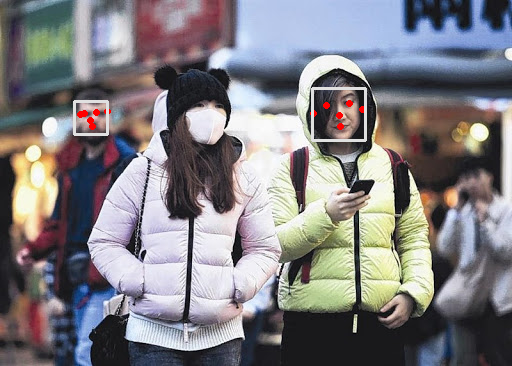

In [13]:
fname = "/content/face-mask-detection/images/maksssksksss0.png"
images = {fname: cv2.imread(fname)}

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:


  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      print("No detections")
      continue
    annotated_image = image.copy()

    bboxes = list()

    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
      bboxes.append([detection.location_data.relative_bounding_box.xmin, 
                     detection.location_data.relative_bounding_box.ymin,
                     detection.location_data.relative_bounding_box.width,
                     detection.location_data.relative_bounding_box.height])
      
      print(bboxes)
    cv2_imshow(annotated_image)